### Image labelling using CNN

This notebook does a transfer learning based on the VGG-16 pre-trained network.

In [1]:
# Import libraries and modules
import numpy as np
import pandas as pd
import pickle

import time
from os import listdir
from os.path import isfile, join

import scipy.io
from PIL import Image

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from keras import Model

from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

from keras import optimizers

tkinter import 
import tkinter.filedialog

Using Theano backend.


### Utility methods

#### Reading pictures and storing them into an array

In [2]:
# Method to read a file picture and return it as VGG-16 requires
def load_img_file(picture_file):
    # Load picture and resez all to 224x224 pixels
    img = load_img(picture_file, target_size=(224, 224))
    
    # Picture has to be converted into Numpy array
    img = img_to_array(img)
    
    return img

### Main execution

In [3]:
# Define data directories
my_data = "../data"
images = my_data + '/Images' # Images folder

In [4]:
# Parameters

# Number of dogs breeds to include
nb_breeds = 10

In [5]:
# Get breed names

folders = [f for f in listdir(images) if (~isfile(join(images, f)) &
                                                f.lower().startswith('n02'))]
breed_id = 0
df_breeds = pd.DataFrame(columns=['breed_id', 'breed_name'])
for folder in folders:
    breed_name = folder[10:]
    df_breeds = df_breeds.append(pd.Series({'breed_id' : breed_id, 'breed_name': breed_name}), ignore_index=True)
    breed_id += 1

In [6]:
df_breeds.head(10)

,breed_id,breed_name
0,0,Chihuahua
1,1,Japanese_spaniel
2,2,Maltese_dog
3,3,Pekinese
4,4,Shih-Tzu
5,5,Blenheim_spaniel
6,6,papillon
7,7,toy_terrier
8,8,Rhodesian_ridgeback
9,9,Afghan_hound


In [7]:
# restore the model
model_name = 'vgg16-{0}-{1}-{2}.pkl'.format(nb_breeds, 'full', '20')
print('Restoring model {0}'.format(model_name))
input_file = open(model_name, 'rb')
model = pickle.load(input_file)
input_file.close()

Restoring model vgg16-10-full-20.pkl


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3, 224, 224)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 224, 224)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 224, 224)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 112, 112)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 112, 112)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 112, 112)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 56, 56)       0         
__________

#### Loading new picture

In [9]:
# Load image
picture = 'n02085782_664.jpg'
folder = join(images,'n02085782-Japanese_spaniel')
picture_file = tkinter.filedialog.askopenfilename()
img = load_img_file(picture_file)
    
# Preprocess input as VGG-16 requires it
new_picture = preprocess_input(img)
new_picture = new_picture.reshape(1, 3, 224, 224)

In [10]:
# Checking imported data. shape returns 
# - the number of pictures
# - The byte depth: 3 = color picture
# - the size in pixels

print(new_picture.shape)


(1, 3, 224, 224)


#### Preprocessing data

In [11]:
# Normalize all values to be between 0 and 1
new_picture = new_picture.astype('float32')

new_picture /= 255

 

In [12]:
# Evaluate model on test data
new_label = model.predict(new_picture)

In [13]:
new_label

array([[1.04443934e-04, 6.51485398e-02, 1.14966792e-08, 2.53100821e-04,
        1.15348655e-06, 5.24151661e-02, 8.81720006e-01, 3.57192941e-04,
        3.05431080e-09, 4.03091377e-07]], dtype=float32)

In [14]:
predicted_breed = np.argmax(new_label)

In [15]:
print("This dog is most likely of breed {0} ".format(df_breeds.loc[predicted_breed, ['breed_name']].values[0]))


This dog is most likely of breed papillon 


In [16]:
def load_img(img_file):
    img = cv2.imread(img_file)
    img_np = np.array(img)
    return img_np

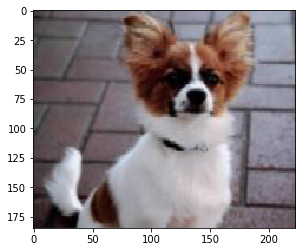

In [20]:
import matplotlib.pyplot as plt
import cv2
dog_img = load_img(picture_file)
dog_img = cv2.cvtColor(dog_img,cv2.COLOR_BGR2RGB)
plt.imshow(dog_img)
# plt.show()

In [19]:
plt.show()